# Introduction to Machine Learning (CSCI-UA.473)

### Homework 1: Linear Models
#### Due: October 2nd, 2023 at 11:59PM


#### Name: Chris Kong
#### Email: zk2086@nyu.edu

#### References and Documents used (outside class):
- Matplotlib 3.8.0 documentation
- PyTorch Documentation
- Introduction to Machine Learning with Python, Andreas C.Muler & Sarah Guido
- Brief Introduction to Machine Learning without Deep Learning, Kyunghyun Cho

#### Discussed with:
- Zhiwen Zheng
- Yang Zheng

### Z Disease Dataset

The Z dataset contains ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) and a quantitative measure of disease progression one year after baseline. Specifically, it comprises a total of 442 samples, where each sample has 10 input features and a target value representing the quantitative measure of disease Z progression.

In [1]:
import pandas as pd

# Load the entire dataset from the CSV file
data = pd.read_csv('FML2023_HW1_dataset.csv')

# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values
feature_names = X.columns.tolist()

In [2]:
print(data.head(10))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.0

In [3]:
import matplotlib
import matplotlib.pyplot as plt

### Question 1: Data Visualization (15 points)
**Task 1.1 (5 points):** Create a scatter plot to visualize the relationship between BMI (Body Mass Index) and disease Z progression.

* Analyze the scatter plot and describe whether there appears to be a positive or negative correlation, or if no clear correlation is evident.
* Can we confidently infer a person's disease Z status using BMI as the only input variable? Explain your reasoning and any potential caveats.

Text(0, 0.5, 'target(disease Z progression)')

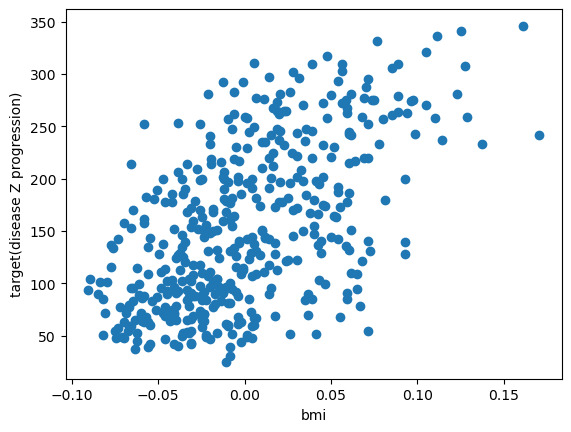

In [4]:
# Add code here
x = data.bmi
y = data.target

plt.scatter(x, y)
plt.xlabel("bmi")
plt.ylabel("target(disease Z progression)")

From the scatter plot we can observe that bmi and target (disease Z progression) are loosely and positively correlated, which means that in general target increases as bmi increases. However, the correlation is weak, as there is a lot of scatter in the data points.  
  
Based on the scatter plot, we cannot confidently infer a person's disease Z status using BMI as the only input variable. This is because there is a lot of overlap in the BMI values of people with different levels of disease Z progression.  
  
In addition to the weak correlation, there are a number of other potential caveats to consider when inferring disease Z status from BMI:

- BMI is a measure of overall body fatness, but it does not distinguish between different types of fat. 
- BMI does not take into account other factors that can influence disease risk, such as diet, exercise, genetics, and medical history.


**Task 1.2 (5 points):** Create a histogram to visualize the distribution of age among Z patients.

* Does the histogram reveal any noticeable peaks, clusters, or trends?

Text(0, 0.5, 'frequency')

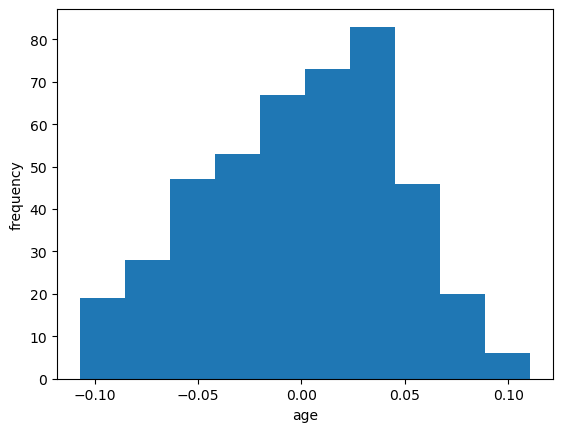

In [5]:
# Add code here

x = data.age

plt.hist(x)
plt.xlabel("age")
plt.ylabel("frequency")

The histogram shows that there is one peak amoung the distribution of ages, which is at around 0.04. On the left side of the peak (age < 0.04), the frequency increases in an approximately constant rate. On the right side of the peak (age > 0.04), the frequency drops dramaticaly.

**Task 1.3 (5 points):** The box plot is a graphical representation that allows you to visually assess the distribution of values and identify potential differences between the two groups. If you're unfamiliar with box plots or need further guidance, you can refer to this [resource](https://www.data-to-viz.com/caveat/boxplot.html) on box plots for a detailed explanation and examples.

Construct a box plot to compare the progression of Z in male and female patients. How does the progression differ between males and females, as revealed by the box plot?

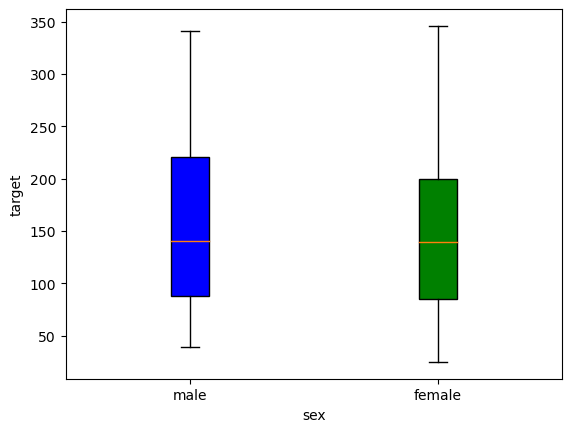

In [6]:
# Add code here
data_sex1 = data[data.sex>0].target
data_sex2 = data[data.sex<0].target

data_by_sex = [data_sex1, data_sex2]

box = plt.boxplot(data_by_sex, labels=["male", "female"], patch_artist = True)

box_colors = ["blue", "green"]

for patch, color in zip(box["boxes"], box_colors):
    patch.set_facecolor(color)

plt.ylabel("target")
plt.xlabel("sex")

plt.show()

The distribution of target are basicly identical in two sexes. But the 'male' group has slightly larger upper quartile than the 'female' group.

### Question 2: Linear, Ridge, and Lasso Regression (8 points)

**Task 2.1 (2 points):** Split the dataset into training and testing sets (80/20\%) split.

In [7]:
# take a review at the original data
data.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [8]:
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('FML2023_HW1_Dataset.csv')

# Separate the features and target values
X = data.drop('target', axis=1) # left alone all the other values as features
y = data['target'] # choose the target/output value

# Split the dataset into training and testing sets (80/20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # randomly split the dataset


**Task 2.2 (2 points):** Linear regression

A linear regression model is a linear function of the parameters of the model. Its output $y$ is a real number or a real vector, depending on the task definition. That is:
$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2$$


* $X_i = [X_1^{(1)}\ldots X_i^{(p)}]$
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{ji}$ represents the values of the j-th feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Define the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

**Task 2.3 (2 points) :** Ridge Regression is a regularized linear regression with an added L2 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda \|\beta\|^2_2$$

* $\lambda$ is the regularization hyper-parameter.

In [10]:
class RidgeRegressionModel(nn.Module):
    def __init__(self, input_dim, lambda_reg=1.0):
        super(RidgeRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.lambda_reg = lambda_reg

    def forward(self, x):
        return self.linear(x)
    
    def get_loss(self, outputs, targets):
        mse_loss = nn.MSELoss()(outputs, targets)
        l2_reg = sum(p.pow(2.0).sum() for p in self.linear.parameters())
        return mse_loss + self.lambda_reg * l2_reg


**Task 2.4 (2 points):** Lasso Regression is a regularized linear regression with an added L1 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda |\beta|$$

In [11]:
class LassoRegressionModel(nn.Module):
    def __init__(self, input_dim, lambda_reg=1.0):
        super(LassoRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.lambda_reg = lambda_reg

    def forward(self, x):
        return self.linear(x)
    
    def get_loss(self, outputs, targets):
        mse_loss = nn.MSELoss()(outputs, targets)
        l1_reg = sum(p.abs().sum() for p in self.linear.parameters())
        return mse_loss + self.lambda_reg * l1_reg


### Question 3: Model Analysis (15 points)

**Task 3.1 (5 points):** Visualize the coefficients of the Linear, Ridge, and Lasso models.
- What will be the impact of increase in the strength of s1 in linear regression?
    - Answer: Around 6.
- Among the three models, which one exhibits a more pronounced reliance on the BMI feature?
    - Answer: The linear regression model show a more pronounced reliance on the BMI feature.

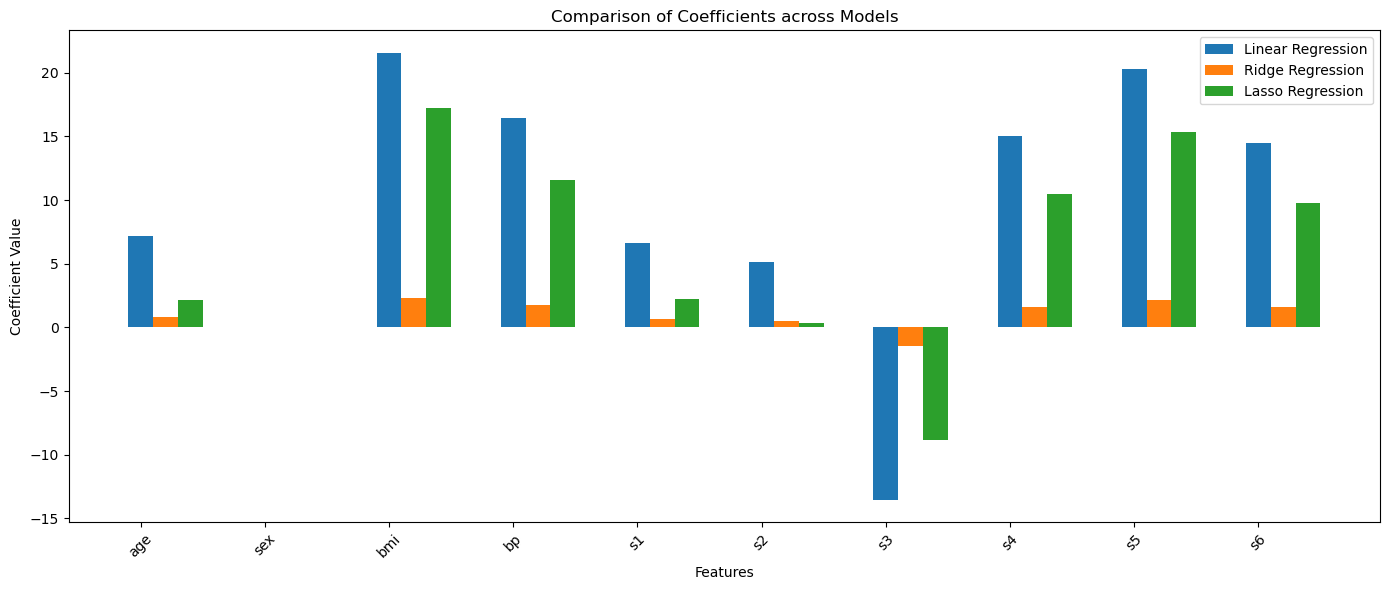

In [17]:
import torch.optim as optim
import matplotlib.pyplot as plt

input_dim = X_train.shape[1]
num_epochs = 500

# Train Linear Regression model
lin_reg = LinearRegressionModel(input_dim)
optimizer_lin = optim.SGD(lin_reg.parameters(), lr=0.01)
for epoch in range(num_epochs):
    outputs = lin_reg(X_train_tensor)
    loss = nn.MSELoss()(outputs, y_train_tensor)
    optimizer_lin.zero_grad()
    loss.backward()
    optimizer_lin.step()

# Train Ridge Regression model
ridge_reg = RidgeRegressionModel(input_dim)
optimizer_ridge = optim.SGD(ridge_reg.parameters(), lr=0.01)
for epoch in range(num_epochs):
    outputs = ridge_reg(X_train_tensor)
    loss = ridge_reg.get_loss(outputs, y_train_tensor)
    optimizer_ridge.zero_grad()
    loss.backward()
    optimizer_ridge.step()

# Train Lasso Regression model
lasso_reg = LassoRegressionModel(input_dim)
optimizer_lasso = optim.SGD(lasso_reg.parameters(), lr=0.01)
for epoch in range(num_epochs):
    outputs = lasso_reg(X_train_tensor)
    loss = lasso_reg.get_loss(outputs, y_train_tensor)
    optimizer_lasso.zero_grad()
    loss.backward()
    optimizer_lasso.step()

# Extract coefficients from the trained models
coefficients_lin = lin_reg.linear.weight[0].detach().numpy()
coefficients_ridge = ridge_reg.linear.weight[0].detach().numpy()
coefficients_lasso = lasso_reg.linear.weight[0].detach().numpy()

# Visualize the coefficients
features = X.columns
x = range(len(features))
plt.figure(figsize=(14, 6))
plt.bar(x, coefficients_lin, width=0.2, align='center', label='Linear Regression')
plt.bar([i+0.2 for i in x], coefficients_ridge, width=0.2, align='center', label='Ridge Regression')
plt.bar([i+0.4 for i in x], coefficients_lasso, width=0.2, align='center', label='Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients across Models')
plt.xticks(x, features, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Task 3.2 (5 points):** Cross-validation involves dividing the available data into multiple subsets or folds to ensure that the model is evaluated on different parts of the data. This helps in obtaining a more accurate estimate of how the model would perform on unseen data. Compare the cross validation scores between Linear, Ridge, and Lasso regression models using a bar plot.

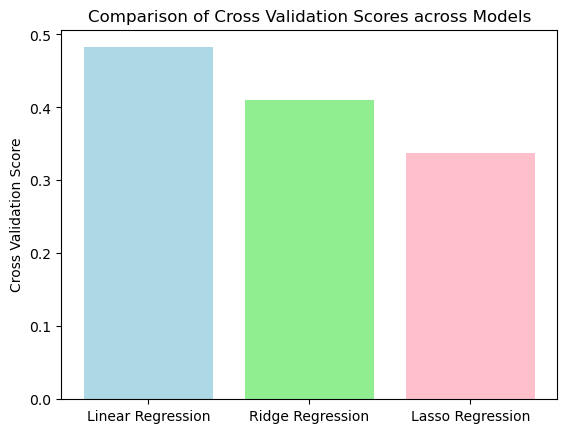

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Convert pandas DataFrame to numpy array
X_np = X.values
y_np = y.values

# Define the models
lin_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Compute cross-validation scores
lin_scores = cross_val_score(lin_model, X_np, y_np, cv=5)
ridge_scores = cross_val_score(ridge_model, X_np, y_np, cv=5)
lasso_scores = cross_val_score(lasso_model, X_np, y_np, cv=5)

# Compute the mean of the scores
mean_scores = [np.mean(lin_scores), np.mean(ridge_scores), np.mean(lasso_scores)]

# Plot the scores
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.bar(labels, mean_scores, color=['lightblue', 'lightgreen', 'pink'])
plt.ylabel('Cross Validation Score')
plt.title('Comparison of Cross Validation Scores across Models')
plt.show()


**Task 3.3 (5 points):** Conduct a grid search for both Lasso and Ridge regression models, and then visualize the differences in results obtained before and after the grid search using a bar plot.
- What are the obtained regularization strength parameters for both models?
    - Answer: 0.001 and 0.001
- Did the grid search improve model performance?
    - Answer: Yes. AS we can observe from the bar graph, the scores after are higher than the scores before the grid search.

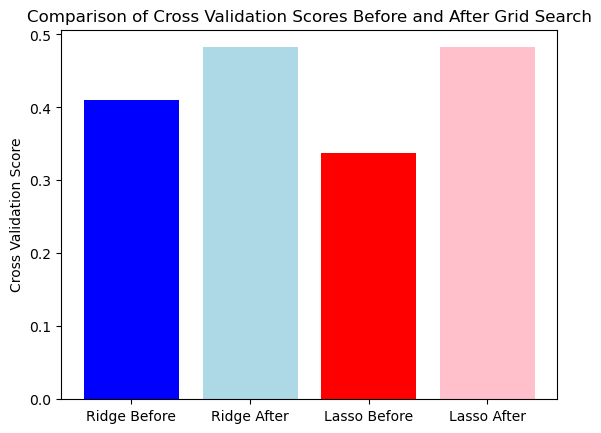

(0.001, 0.001)

In [19]:
from sklearn.model_selection import GridSearchCV

# Parameters for grid search
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Grid search for Ridge Regression
ridge_grid = GridSearchCV(Ridge(), parameters, cv=5)
ridge_grid.fit(X_np, y_np)

# Grid search for Lasso Regression
lasso_grid = GridSearchCV(Lasso(), parameters, cv=5)
lasso_grid.fit(X_np, y_np)

# Compute cross-validation scores before grid search
ridge_scores_before = np.mean(cross_val_score(Ridge(), X_np, y_np, cv=5))
lasso_scores_before = np.mean(cross_val_score(Lasso(), X_np, y_np, cv=5))

# Extract best scores after grid search
ridge_scores_after = ridge_grid.best_score_
lasso_scores_after = lasso_grid.best_score_

# Visualize the results
labels = ['Ridge Before', 'Ridge After', 'Lasso Before', 'Lasso After']
scores = [ridge_scores_before, ridge_scores_after, lasso_scores_before, lasso_scores_after]
plt.bar(labels, scores, color=['blue', 'lightblue', 'red', 'pink'])
plt.ylabel('Cross Validation Score')
plt.title('Comparison of Cross Validation Scores Before and After Grid Search')
plt.show()

ridge_best_alpha = ridge_grid.best_params_['alpha']
lasso_best_alpha = lasso_grid.best_params_['alpha']

ridge_best_alpha, lasso_best_alpha


### Question 4: Bias and Variance Tradeoff (12 points)

**Task 4.1 (5 points)** Describe the bias-variance tradeoff, how it affects model performance, and explain the relationship between model complexity and bias/variance. Use markdown cells for explanation.

**Task 4.2 (7 points):** Consider the Z dataset with input features X and target values y. Introduce polynomial features with degrees 1 to 8 to transform the input features into higher-degree polynomials.

To demonstrate the bias-variance tradeoff, fit regression models of to the transformed dataset. Then, create line plots where the x-axis represents the polynomial degrees, and the y-axis represents the Mean Squared Error (MSE) for both the training and testing datasets. Compare the errors between these models.


### Answer to 4.1
**Bias:**  
Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a too-simplified model. It can lead to underfitting, where the model does not capture the underlying patterns of the data, resulting in poor performance.  

**Variance:**  
Variance refers to the model's sensitivity to small fluctuations in the training set. High variance can lead to overfitting, where the model captures the noise in the training data, making it perform poorly on unseen data.  

**Tradeoff:**  
As we increase the complexity of a model (for instance, by adding more features or increasing the degree of polynomials), the bias decreases but the variance increases, and vice versa. The goal is to find a balance where we minimize the total error, which is the sum of bias^2, variance, and irreducible error.  

**Relationship between Model Complexity and Bias/Variance:**
- Low Complexity (e.g., Linear Regression with few features): High bias and low variance. The model might be too simple to capture underlying patterns in the data, leading to underfitting.  

- High Complexity (e.g., High-degree Polynomial Regression): Low bias and high variance. The model might fit the training data very well, even capturing the noise, but perform poorly on unseen data, leading to overfitting.

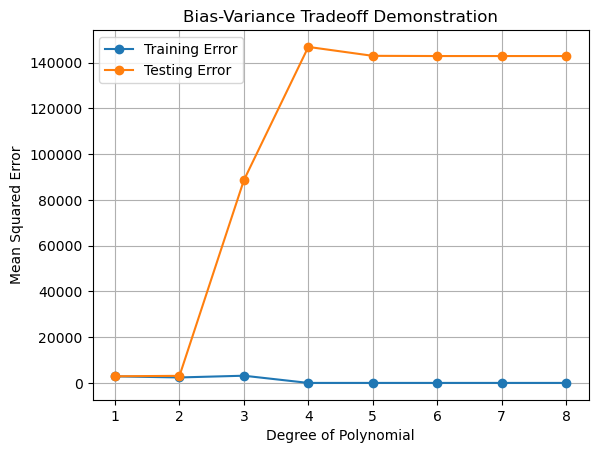

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the Z dataset into training and testing sets (assuming Z dataset is already loaded as X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_errors = []
test_errors = []

degrees = list(range(1, 9))

for degree in degrees:
    # Introduce polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Fit regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict and compute MSE
    train_pred = model.predict(X_poly_train)
    test_pred = model.predict(X_poly_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff Demonstration')
plt.legend()
plt.grid(True)
plt.show()

#### Z dataset (Classification)

For the last question, we will create a classification version of the Z dataset as follows:

Class 0: Denotes Z progression values that fall below the 50th percentile of the original target variable.

Class 1: Denotes Z progression values that surpass the 50th percentile of the original target variable.

In [21]:
from sklearn.utils import shuffle #import shuffle method from libary

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create the target variable
y = np.where(y > np.percentile(y, 50), 1, 0)

### Question 5: Logistic Regression from Scratch (20 points)


**Task 5.1 (2 points):** Implement the sigmoid function.    
**Task 5.2 (7 points):** Initialize the weights and biases to zeros and implement gradient descent.   
**Task 5.3 (6 points):** Implement the predict and predict_proba functions:
  - predict returns a single discrete category corresponding to the class that has been predicted.
  - predict_proba returns continuous values that represent the likelihood of each input belonging to each class.

In [22]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(linear_model)
        class_labels = [1 if i > 0.5 else 0 for i in predictions]
        return class_labels

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def get_params(self, deep=True):
        return {
            "learning_rate": self.learning_rate,
            "num_iterations": self.num_iterations
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


**Task 5.4 (5 points):** Create an instance of a LogisticRegressionScratch model and train it using a new (80/20%) split of the classification dataset. Afterwards, calculate the accuracy, precision, recall, and F1 score (you can use available machine learning libraries).

In [23]:
### Add code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create an instance of LogisticRegressionScratch and train it
lr_model = LogisticRegressionScratch(learning_rate=0.01, num_iterations=1000)
lr_model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = lr_model.predict(X_test)

# 4. Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.5955056179775281,
 0.5416666666666666,
 0.9285714285714286,
 0.6842105263157894)